In [2]:
def model(x):
    y = -10.1*x**2 + 10.6*x + 300.7
    return y

In [18]:
import numpy as np

centers = [-3.8,1,1.8,4.1,5]
cen_rep = -6

x = np.array([])
y = np.array([])
xx = np.zeros([5,100])
yy = np.zeros([5,100])
for (i,cen) in enumerate(centers):
    xx[i,:] = cen + np.random.normal(loc=0, scale=0.1, size=100)
    x = np.append(x, xx[i])
    yy[i,:] = model(xx[i,:]) + np.random.normal(loc=0, scale=100, size=100)
    y = np.append(y, yy[i])

x_rep = cen_rep + np.random.normal(loc=0, scale=0.1, size=100)
y_rep = model(x_rep) + np.random.normal(loc=0, scale=100, size=100)

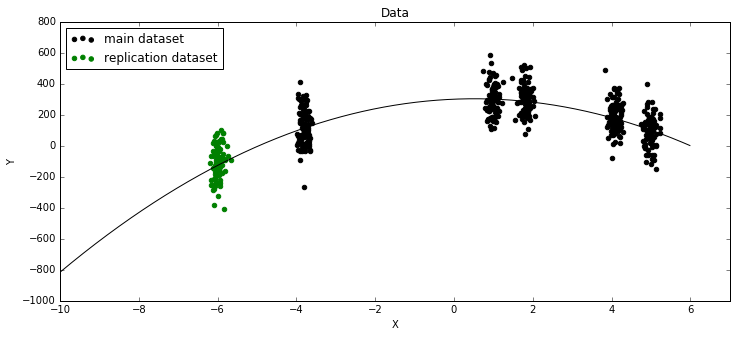

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[12,5])
plt.plot(np.arange(-10,6,.01), model(np.arange(-10,6,.01)),color='black')
plt.scatter(x,y,color='black',label='main dataset')
plt.scatter(x_rep,y_rep,color='green',label='replication dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data')
plt.xlim([-10,7])
plt.legend(loc='upper left')

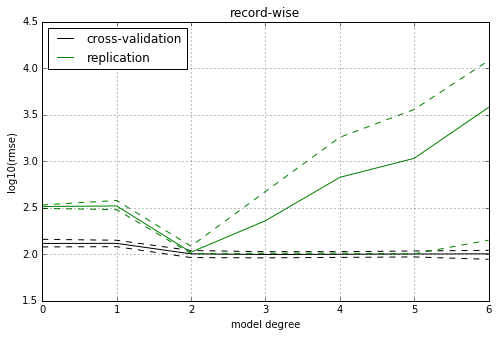

In [42]:
# record-wise
n_bootstrap = 100
n_train = 250
rmse = np.zeros([7,n_bootstrap])
rmse_rep = np.zeros([7,n_bootstrap])
ind = np.arange(0,500)
for degree in range(7):
    for i in range(n_bootstrap):
        np.random.shuffle(ind)
        x_train = x[ind[:n_train]]
        y_train = y[ind[:n_train]]
        x_test = x[ind[n_train:]]
        y_test = y[ind[n_train:]]
        p = np.polyfit(x_train, y_train, deg=degree, rcond=None, full=False, w=None, cov=False)
        y_pred = np.polyval(p, x_test)
        rmse[degree,i] = np.sqrt(np.mean((y_pred-y_test)**2))
        y_pred_rep = np.polyval(p, x_rep)
        rmse_rep[degree,i] = np.sqrt(np.mean((y_pred_rep-y_rep)**2))
plt.figure(figsize=[8,5])
plt.plot(range(7),np.log10(np.mean(rmse, axis=1)),color='black',label='cross-validation')
plt.plot(range(7),np.log10(np.min(rmse, axis=1)),'--',color='black')
plt.plot(range(7),np.log10(np.max(rmse, axis=1)),'--',color='black')
plt.plot(range(7),np.log10(np.mean(rmse_rep, axis=1)),color='green',label='replication')
plt.plot(range(7),np.log10(np.min(rmse_rep, axis=1)),'--',color='green')
plt.plot(range(7),np.log10(np.max(rmse_rep, axis=1)),'--',color='green')
plt.xlabel('model degree')
plt.ylabel('log10(rmse)')
plt.title('record-wise')
plt.grid()
# plt.ylim([0, 2000])
plt.legend(loc='upper left')

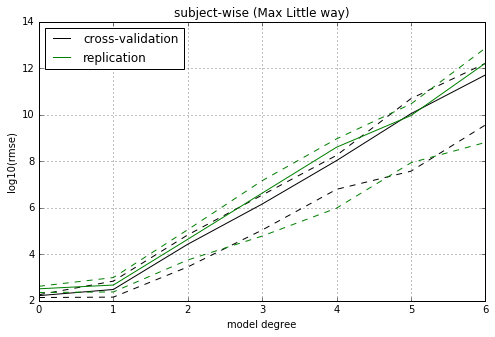

In [43]:
# subject-wise (Little way)
# n_bootstrap = 100
# n_train_range = [1,2,3,4] # number of train subjects
rmse = np.zeros([7,5])
rmse_rep = np.zeros([7,5])
inds = np.arange(5)
for degree in range(7):
    for i in range(5):
#         n_train = np.random.choice(np.array(n_train_range),size=1)[0]
#         n_train = 1
#         np.random.shuffle(inds)
#         ind_train = inds[:n_train]
#         ind_test = inds[n_train:]
        ind_train = [i]
        ind_test = [j for j in np.arange(5) if j!=i]
        
        x_train = np.concatenate(np.array([xx[j,:] for j in ind_train]))
        y_train = np.concatenate(np.array([yy[j,:] for j in ind_train]))
        x_test = np.concatenate(np.array([xx[j,:] for j in ind_test]))
        y_test = np.concatenate(np.array([yy[j,:] for j in ind_test]))

        # stratification
#         x_train = np.random.choice(x_train, size=250, replace=True)
#         y_train = np.random.choice(y_train, size=250, replace=True)
#         x_test = np.random.choice(x_test, size=100, replace=False)
#         y_test = np.random.choice(y_test, size=100, replace=False)

        p = np.polyfit(x_train, y_train, deg=degree, rcond=None, full=False, w=None, cov=False)
        y_pred = np.polyval(p, x_test)
        rmse[degree,i] = np.sqrt(np.mean((y_pred-y_test)**2))
        y_pred_rep = np.polyval(p, x_rep)
        rmse_rep[degree,i] = np.sqrt(np.mean((y_pred_rep-y_rep)**2))
    

plt.figure(figsize=[8,5])
plt.plot(range(7),np.log10(np.mean(rmse,axis=1)),color='black',label='cross-validation')
plt.plot(range(7),np.log10(np.max(rmse, axis=1)),'--',color='black')
plt.plot(range(7),np.log10(np.min(rmse, axis=1)),'--',color='black')
plt.plot(range(7),np.log10(np.mean(rmse_rep,axis=1)),color='green',label='replication')
plt.plot(range(7),np.log10(np.max(rmse_rep, axis=1)),'--',color='green')
plt.plot(range(7),np.log10(np.min(rmse_rep, axis=1)),'--',color='green')
# plt.plot(range(7),np.mean(rmse, axis=1),color='black')
# plt.plot(range(7),np.max(rmse, axis=1),'--',color='black')
# plt.plot(range(7),np.min(rmse, axis=1),'--',color='black')
plt.xlabel('model degree')
plt.ylabel('log10(rmse)')
plt.title('subject-wise (Max Little way)')
plt.grid()
plt.legend(loc='upper left')

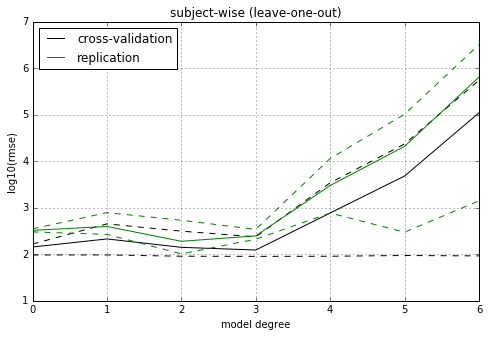

In [44]:
# subject-wise (leave-one-out)
rmse = np.zeros([7,5])
rmse_rep = np.zeros([7,5])
for degree in range(7):
    for i in range(5):
        x_test = xx[i,:]
        y_test = yy[i,:]
        x_train = np.concatenate(np.array([xx[j,:] for j in range(5) if j!=i]))
        y_train = np.concatenate(np.array([yy[j,:] for j in range(5) if j!=i]))

        # stratification
#         x_train = np.random.choice(x_train, size=250, replace=False)
#         y_train = np.random.choice(y_train, size=250, replace=False)
#         x_test = np.random.choice(x_test, size=250, replace=True)
#         y_test = np.random.choice(y_test, size=250, replace=True)

        p = np.polyfit(x_train, y_train, deg=degree, rcond=None, full=False, w=None, cov=False)
        y_pred = np.polyval(p, x_test)
        rmse[degree,i] = np.sqrt(np.mean((y_pred-y_test)**2))
        y_pred_rep = np.polyval(p, x_rep)
        rmse_rep[degree,i] = np.sqrt(np.mean((y_pred_rep-y_rep)**2))
    
plt.figure(figsize=[8,5])
plt.plot(range(7),np.log10(np.mean(rmse, axis=1)),color='black',label='cross-validation')
plt.plot(range(7),np.log10(np.max(rmse, axis=1)),'--',color='black')
plt.plot(range(7),np.log10(np.min(rmse, axis=1)),'--',color='black')
plt.plot(range(7),np.log10(np.mean(rmse_rep, axis=1)),color='green',label='replication')
plt.plot(range(7),np.log10(np.max(rmse_rep, axis=1)),'--',color='green')
plt.plot(range(7),np.log10(np.min(rmse_rep, axis=1)),'--',color='green')
plt.xlabel('model degree')
plt.ylabel('log10(rmse)')
plt.title('subject-wise (leave-one-out)')
plt.grid()
plt.legend(loc='upper left')